In [3]:
import pandas as pd

df = pd.read_csv('marketing_campaign.csv', sep='\t')

In [4]:
df['age'] = 2022 - df['Year_Birth']

In [5]:
df['age']

0       65
1       68
2       57
3       38
4       41
        ..
2235    55
2236    76
2237    41
2238    66
2239    68
Name: age, Length: 2240, dtype: int64

In [6]:
df2 = df[['age', 'Year_Birth', 'Kidhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']]

In [7]:
df2 = df2.drop('Year_Birth', axis=1)

In [8]:
df2.loc[(df2['age']>19) & (df2['age']<30), 'range'] = '0-30'
df2.loc[(df2['age'] > 29) & (df2['age'] < 40), 'range'] = '30-40'
df2.loc[(df2['age'] > 39) & (df2['age'] < 50), 'range'] = '40-50'
df2.loc[(df2['age'] > 49) & (df2['age'] < 60), 'range'] = '50-60'
df2.loc[(df2['age'] > 59), 'range'] = 'over 60'

In [9]:
df2['Kidhome'] = df['Kidhome'].map({0:0,
                                    1:1,
                                   2:1})

In [10]:
df2 = df2[['age', 'range', 'Kidhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']]

In [105]:
df2

,age,range,Kidhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts
0,65,over 60,0,635,88,546,172,88
1,68,over 60,1,11,1,6,2,1
2,57,50-60,0,426,49,127,111,21
3,38,30-40,1,11,4,20,10,3
4,41,40-50,1,173,43,118,46,27
...,...,...,...,...,...,...,...,...
2235,55,50-60,0,709,43,182,42,118
2236,76,over 60,1,406,0,30,0,0
2237,41,40-50,0,908,48,217,32,12
2238,66,over 60,0,428,30,214,80,30


In [11]:
df3 = df2
df4 = df2
df5 = df2

In [12]:
df5['shop'] = df4['MntWines'] + df4['MntFruits'] + df4['MntMeatProducts'] + df4['MntFishProducts'] + df4['MntSweetProducts']

In [13]:
df5 = df5.drop(['range', 'Kidhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts'], axis=1)
df5

,age,shop
0,65,1529
1,68,21
2,57,734
3,38,48
4,41,407
...,...,...
2235,55,1094
2236,76,436
2237,41,1217
2238,66,782


In [202]:
df3 = df3.drop('age', axis=1)

In [203]:
df3 = df3.groupby(['range'])[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].mean()

In [204]:
df4['shop'] = df4['MntWines'] + df4['MntFruits'] + df4['MntMeatProducts'] + df4['MntFishProducts'] + df4['MntSweetProducts']

In [219]:
df3

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts
range,,,,,
0-30,357.133333,43.266667,341.800000,93.733333,46.066667
30-40,236.062937,27.716783,177.961538,33.734266,28.678322
40-50,243.335484,23.079032,146.127419,34.843548,24.658065
50-60,309.001613,26.140323,152.582258,34.350000,25.474194
over 60,379.822604,28.361946,189.905579,43.065808,29.536481


In [207]:
df4 = df4.drop(['age', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts'], axis=1)

In [208]:
df4

,range,Kidhome,shop
0,over 60,0,1529
1,over 60,1,21
2,50-60,0,734
3,30-40,1,48
4,40-50,1,407
...,...,...,...
2235,50-60,0,1094
2236,over 60,1,436
2237,40-50,0,1217
2238,over 60,0,782


In [209]:
df4 = df4.groupby(['range', 'Kidhome'])['shop'].mean()

In [46]:
import matplotlib.pyplot as plt

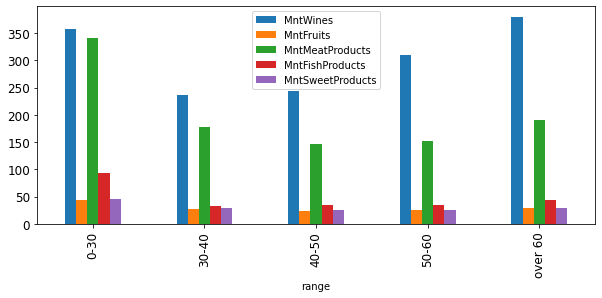

In [104]:
ax = df3.plot(kind='bar', stacked=False, figsize=(10,4), legend=True, fontsize=12)

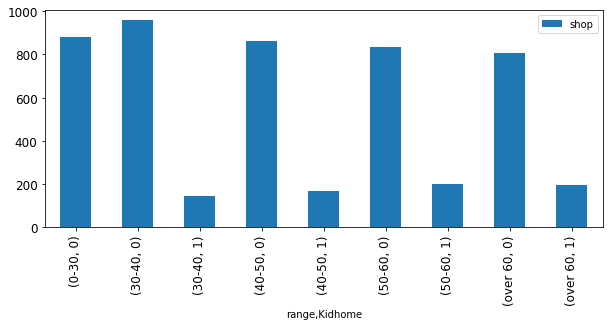

In [91]:
ax = df4.plot(kind='bar', stacked=False, figsize=(10,4), legend=True, fontsize=12)

In [18]:
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

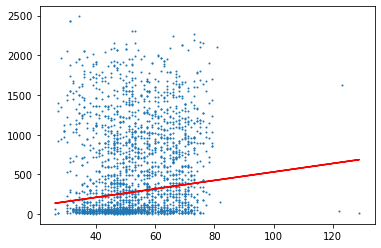

In [19]:
#median_income	median_house_value
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

X = np.array(df5['age']).reshape(-1,1)
y = df5['shop']
lr = LinearRegression()
lr.fit(X, y)
#print(lr.coef_)

w = lr.coef_[0]

plt.scatter(X, y, s=1)
plt.plot(X, w*X, c='red')


In [27]:
test_df = df5.iloc[:2000:4]

train loss;  328265.09669808403
test loss;  344409.85207186686
0.0056142318280772985


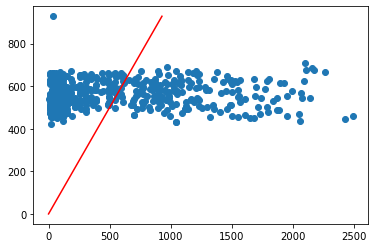

In [28]:
import numpy as np
from sklearn.linear_model import LinearRegression ######
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

X = np.array(df5.iloc[:,:1])
#print(X)
y = df5['shop'] # column 3
lr = LinearRegression()
lr.fit(X, y)
#print(lr.coef_)

train_y = lr.predict(X)
train_loss = mean_squared_error(y, train_y)
print('train loss; ', train_loss)


test_X = np.array(test_df.iloc[:, :1])
pred_y = lr.predict(test_X)
test_y = test_df['shop'] # column 3

test_loss = mean_squared_error(test_y, pred_y)

print('test loss; ', test_loss)

plt.scatter(test_y, pred_y)
plt.plot([0,np.max(pred_y)],[0,np.max(pred_y)], color='red')

from sklearn.metrics import r2_score
r2 = r2_score(test_y, pred_y)
print(r2)

In [45]:
from sklearn.metrics import f1_score 

print(f1_score(y, pred_y))

ValueError: Found input variables with inconsistent numbers of samples: [2240, 500]